In [1]:
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.datasets import imdb

# 가장 자주 등장하는 단어 500개만 사용
(train_input, train_target), (test_input, test_target) = imdb.load_data(
    num_words = 500)

from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size = 0.2, random_state = 42)

In [2]:
# 시퀀스 데이터의 길이를 맞추는 함수 : pad_sequences()
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen = 100)
val_seq = pad_sequences(val_input, maxlen = 100)

In [3]:
from tensorflow import keras
model = keras.Sequential()

model.add(keras.layers.Embedding(500, 16, input_length = 100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [4]:
model.summary()
# 800 : 더 오랜 기억 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           8000      
_________________________________________________________________
lstm (LSTM)                  (None, 8)                 800       
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [5]:
# 모델 설정과 훈련
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model.compile(optimizer = rmsprop, 
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])
# 복구점
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5')

# 조기종료
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, 
                                                  restore_best_weights=True)

history = model.fit(train_seq, train_target, epochs=100, batch_size = 64, 
                    validation_data=(val_seq, val_target), 
                    callbacks=[checkpoint_cb, early_stopping_cb])

Train on 20000 samples, validate on 5000 samples
Epoch 1/100
20000/20000 [==============================] - 11s 540us/sample - loss: 0.6923 - accuracy: 0.5394 - val_loss: 0.6912 - val_accuracy: 0.5892
Epoch 2/100
20000/20000 [==============================] - 9s 425us/sample - loss: 0.6897 - accuracy: 0.5963 - val_loss: 0.6876 - val_accuracy: 0.6298
Epoch 3/100
20000/20000 [==============================] - 9s 431us/sample - loss: 0.6839 - accuracy: 0.6426 - val_loss: 0.6789 - val_accuracy: 0.6500
Epoch 4/100
20000/20000 [==============================] - 8s 412us/sample - loss: 0.6683 - accuracy: 0.6673 - val_loss: 0.6512 - val_accuracy: 0.6854
Epoch 5/100
20000/20000 [==============================] - 9s 438us/sample - loss: 0.6074 - accuracy: 0.7176 - val_loss: 0.5726 - val_accuracy: 0.7188
Epoch 6/100
20000/20000 [==============================] - 9s 427us/sample - loss: 0.5523 - accuracy: 0.7374 - val_loss: 0.5425 - val_accuracy: 0.7464
Epoch 7/100
20000/20000 [===================

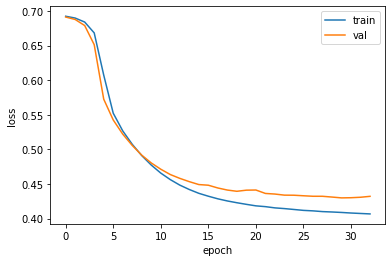

In [6]:
# 훈련소실과 검증손실 시각화
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [7]:
model2 = keras.Sequential()

model2.add(keras.layers.Embedding(500, 16, input_length = 100))
model2.add(keras.layers.LSTM(8, dropout = 0.3))
model2.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [8]:
#모델 설정과 훈련
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model2.compile(optimizer = rmsprop, 
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

# 복구점
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model2.h5')

# 조기종료
# patience=3 - 손실율이 3번 이상 내려가지 않을때 종료
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, 
                                                  restore_best_weights=True)

# history라는 딕셔너리 객체 반환 밑의 history 변수라는 건 다름
history = model2.fit(train_seq, train_target, epochs=100, batch_size = 64,
                    validation_data=(val_seq, val_target), 
                    callbacks=[checkpoint_cb, early_stopping_cb])

Train on 20000 samples, validate on 5000 samples
Epoch 1/100
20000/20000 [==============================] - 11s 529us/sample - loss: 0.6920 - accuracy: 0.5436 - val_loss: 0.6907 - val_accuracy: 0.6022
Epoch 2/100
20000/20000 [==============================] - 9s 430us/sample - loss: 0.6877 - accuracy: 0.6179 - val_loss: 0.6837 - val_accuracy: 0.6568
Epoch 3/100
20000/20000 [==============================] - 8s 422us/sample - loss: 0.6618 - accuracy: 0.6360 - val_loss: 0.6321 - val_accuracy: 0.6440
Epoch 4/100
20000/20000 [==============================] - 8s 423us/sample - loss: 0.6107 - accuracy: 0.7132 - val_loss: 0.5982 - val_accuracy: 0.7300
Epoch 5/100
20000/20000 [==============================] - 9s 429us/sample - loss: 0.5848 - accuracy: 0.7397 - val_loss: 0.5749 - val_accuracy: 0.7354
Epoch 6/100
20000/20000 [==============================] - 9s 428us/sample - loss: 0.5633 - accuracy: 0.7478 - val_loss: 0.5546 - val_accuracy: 0.7512
Epoch 7/100
20000/20000 [===================

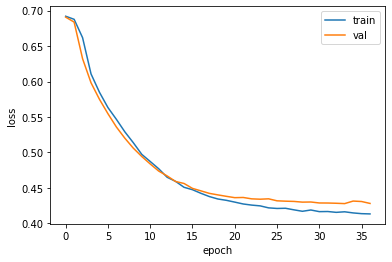

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [10]:
model3 = keras.Sequential()

model3.add(keras.layers.Embedding(500, 16, input_length = 100))
# return_sequence = True : 기억해서 그다음에게 넘겨줌
model3.add(keras.layers.LSTM(8, dropout = 0.3, return_sequences = True))
model3.add(keras.layers.LSTM(8, dropout = 0.3))
model3.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [11]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 8)            800       
_________________________________________________________________
lstm_3 (LSTM)                (None, 8)                 544       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [12]:
#모델 설정과 훈련
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model3.compile(optimizer = rmsprop, 
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

# 복구점
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model2.h5')

# 조기종료
# patience=3 - 손실율이 3번 이상 내려가지 않을때 종료
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, 
                                                  restore_best_weights=True)

# history라는 딕셔너리 객체 반환 밑의 history 변수라는 건 다름
history = model3.fit(train_seq, train_target, epochs=100, batch_size = 64,
                    validation_data=(val_seq, val_target), 
                    callbacks=[checkpoint_cb, early_stopping_cb])

Train on 20000 samples, validate on 5000 samples
Epoch 1/100
20000/20000 [==============================] - 20s 988us/sample - loss: 0.6928 - accuracy: 0.5311 - val_loss: 0.6922 - val_accuracy: 0.5756
Epoch 2/100
20000/20000 [==============================] - 16s 808us/sample - loss: 0.6904 - accuracy: 0.5827 - val_loss: 0.6877 - val_accuracy: 0.6360
Epoch 3/100
20000/20000 [==============================] - 16s 784us/sample - loss: 0.6791 - accuracy: 0.6446 - val_loss: 0.6654 - val_accuracy: 0.6688
Epoch 4/100
20000/20000 [==============================] - 16s 805us/sample - loss: 0.6289 - accuracy: 0.6862 - val_loss: 0.5837 - val_accuracy: 0.7070
Epoch 5/100
20000/20000 [==============================] - 16s 793us/sample - loss: 0.5607 - accuracy: 0.7244 - val_loss: 0.5405 - val_accuracy: 0.7366
Epoch 6/100
20000/20000 [==============================] - 16s 811us/sample - loss: 0.5288 - accuracy: 0.7495 - val_loss: 0.5206 - val_accuracy: 0.7488
Epoch 7/100
20000/20000 [==============

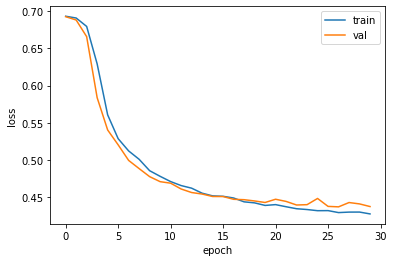

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()